In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### matlab style

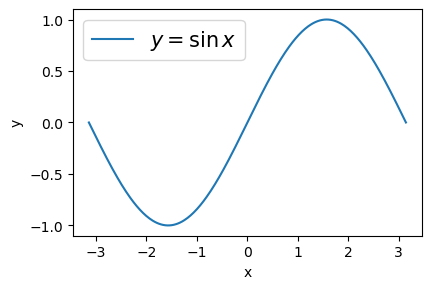

In [2]:
x = np.linspace(-np.pi, np.pi, 300)
y = np.sin(x)
plt.figure(dpi=100, figsize=(4.5,3))
plt.plot(x,y,label='$y=\sin x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15)
plt.show()
plt.close()

#### equivalent to

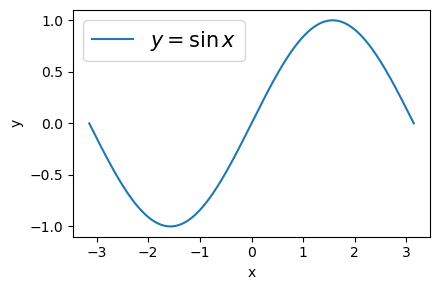

In [3]:
x = np.linspace(-np.pi, np.pi, 300)
y = np.sin(x)

fig = plt.figure(tight_layout=True, figsize=(4.5,3), dpi=100)
ax = plt.gca()
# can also obtain by this way
# fig = plt.gcf()
# ax = plt.gca()
ax.plot(x,y,label='$y=\sin x$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(fontsize=15)
plt.show()
plt.close()

#### most command is get and set

In [29]:
fig = plt.figure(tight_layout=True, figsize=(4.5,3), dpi=100)
ax = plt.gca()
print(ax.get_xticks())
print(ax.get_xlim())
print(ax.get_ylim())
print(ax.get_aspect())
print([xx.get_text() for xx in ax.xaxis.get_ticklabels()])
plt.close()

[0.  0.2 0.4 0.6 0.8 1. ]
(0.0, 1.0)
(0.0, 1.0)
auto
['', '', '', '', '', '']


In [28]:
# most times, they return the same result
plt.figure()
a0 = plt.hist2d((1,1),(2,2))
plt.close()
print(a0[3])

fig = plt.figure()
ax = plt.gca()
a1 = ax.hist2d((1,1),(2,2))
plt.close()
print(a1[3])

#### line plot and legend

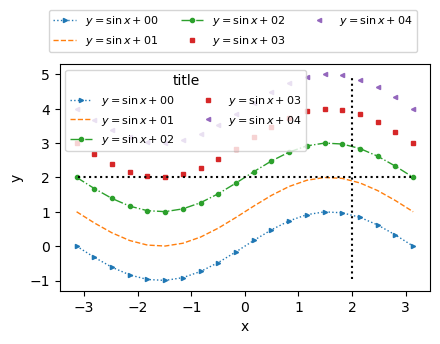

In [343]:
x = np.linspace(-np.pi, np.pi, 20)
y = np.sin(x)

fig = plt.figure(tight_layout=True, figsize=(4.5,3), dpi=100)
ax = plt.gca()

style1 = [':','--','-.','', '']
style2 = ['>','','o','s','<']
p1 = []
for i in range(len(style1)):
    p = ax.plot(x, y+i,
            linestyle = style1[i],
            marker = style2[i],
            linewidth = 1,
            markersize = 3,
            label=f'$y=\sin x + {i:02d} $')
    p1.append(p[0])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
ax.legend(fontsize=8, ncol=2, title='title') # can add shadow, change color
fig.legend(handles=p1, loc='upper right', ncol=3, fontsize=8, 
           bbox_to_anchor=(0.95, 1.15) # magic number
          )
ax.axvline(2, ymin=0.05, ymax=0.95, c='k',ls=':') # is scale
ax.axhline(2, xmin=0.05, xmax=0.95, c='k',ls=':')
# this can be also used for subplots
plt.show()
plt.close()

#### tick operation

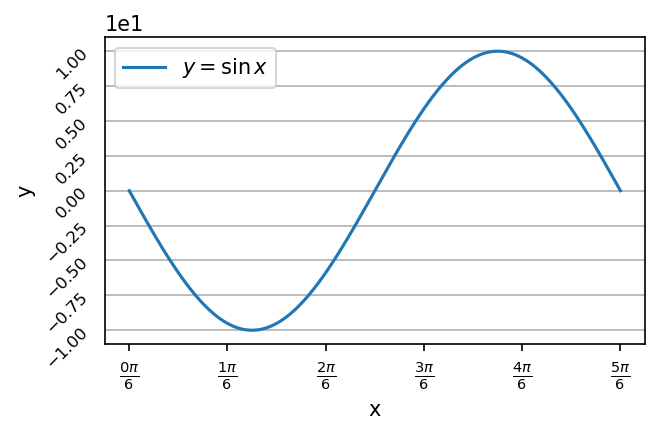

In [327]:
x = np.linspace(-np.pi, np.pi, 300)
y = 1e1*np.sin(x)

fig = plt.figure(tight_layout=True, figsize=(4.5,3), dpi=150)
ax = plt.gca()
# can also obtain by this way
# fig = plt.gcf()
# ax = plt.gca()
ax.plot(x,y,label='$y=\sin x$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(fontsize=10)


# ticks
ax.tick_params(which="both", bottom=True)
ax.tick_params(which="both", left=False)

# bins
ax.locator_params(nbins=5, axis='x') # number
ax.locator_params(nbins=10, axis='y')
ax.tick_params(axis = 'y', which = 'major', labelsize = 8, rotation=45)

# modify ticklabel
ax.set_xticks(np.linspace(-np.pi,np.pi, 6))
ticklabel = []
for index, tk in enumerate(ax.get_xticks()):
    ticklabel.append(r'$\frac{%d\pi}{6}$' % index)

# ax.set_xticklabels(ticklabel)
ax.set_xticklabels(ticklabel)

# in scientific notation
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 
# plain is non-sci
# (0,0) include all number, else (m,n)

ax.yaxis.grid('ON')

plt.show()
plt.close()

#### error

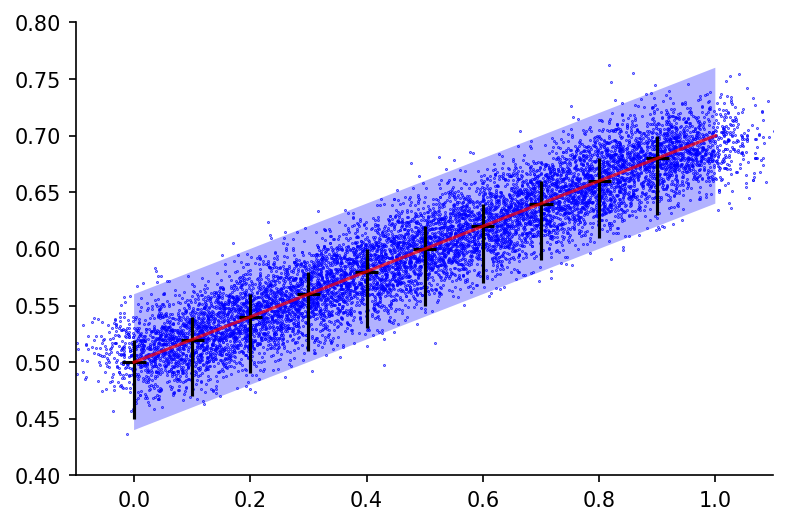

In [26]:
N = 10000
x = np.linspace(0,1,N)
y = 0.2 * x + 0.5
fig = plt.figure(dpi=150)
ax = fig.add_subplot()
ax.plot(x, y, alpha=0.7, c='r')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0.4,0.8)
ax.scatter(x+0.05*np.random.randn(len(y),), y+0.02*np.random.randn(len(y),), s=0.1, c='b')
ax.fill_between(x, y-0.06, y+0.06, alpha=0.3, facecolor='b')
ax.errorbar(x[::1000], y[::1000], linestyle='',
            xerr = 0.02,
            yerr = (0.05*np.ones_like(x[::1000]), 0.02*np.ones_like(x[::1000])), # all positive
            c='k')

# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# better not set to white color, hard to check, seems done in seaborn
# spines['bottom'].set_color('w')

#### box plot

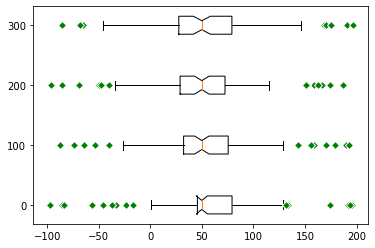

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50,4) * 100
center = np.ones((25,4)) * 50
flier_high = np.random.rand(10,4) * 100 + 100
flier_low = np.random.rand(10,4) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig, ax = plt.subplots()

ax.boxplot(data, notch=True, vert=False,
           positions = 100 * np.arange(4), widths=30, 
           # sym='ks', will cover the next
           flierprops=dict(markersize=6,
                           markerfacecolor='g', 
                           marker='D', 
                           markeredgecolor='w'))

plt.show()
plt.close()

#### 1-d histogram

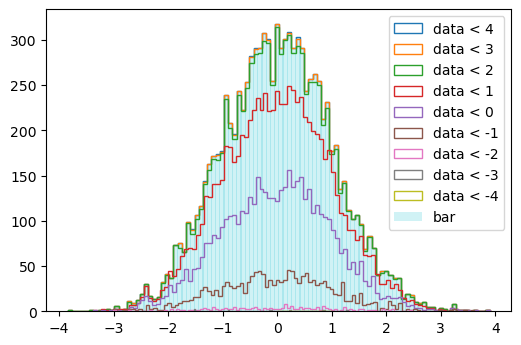

In [322]:
x = np.random.randn(10000)
y = np.random.randn(10000)
h, xedges = np.histogram(x, bins=100)

fig, ax = plt.subplots(dpi=100)

for num in np.arange(4,-5,-1):
    p = ax.hist(x[y<num], bins=100,
             histtype = 'step',
             # density = True, # make constant weight invalid
             # orientation='horizontal', if need
             label=f'data < {num:d}'
            )
xx = 1/2*(xedges[:-1] + xedges[1:])
ax.bar(x=xx, 
       height=h,
       # height=h/len(x)/(xedges[1] - xedges[0]), # normalize
       width=0.1,
      alpha=0.2,
      label='bar')
ax.legend()
plt.show()
plt.close()

#### scatter plot

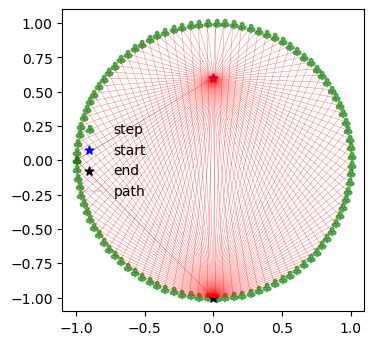

In [403]:
x0 = np.array((0,0.6))
x1 = np.array((0,-1))
theta = np.linspace(-np.pi,np.pi,100)
y = np.vstack((np.cos(theta), np.sin(theta))).T
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')

# ax.arrow(x=x0[0], y = x0[1], 
#          dx=x1[0] - x0[0], dy = x1[1] - x0[1], width=0.01, alpha=0.9)
# arrow can be found in https://matplotlib.org/stable/gallery/text_labels_and_annotations/arrow_demo.html#sphx-glr-gallery-text-labels-and-annotations-arrow-demo-py
for a in y:
    data = np.vstack((x0,a)).T
    ax.plot(data[0], data[1], color='r', linewidth=0.3, alpha=0.6)
    data = np.vstack((a,x1)).T
    p1 = ax.plot(data[0], data[1], color='r', linewidth=0.3, alpha=0.6, label='path')
l1 = ax.scatter(y[:,0], y[:,1], s=40, marker=r'$\clubsuit$', color='g', alpha=0.6, label='step')
l2 = ax.scatter(x0[0], x0[1], s=40, marker='*', color='b', label='start')
l3 = ax.scatter(x1[0], x1[1], s=40, marker='*', color='k', label='end')
ax.legend(handles=[l1, l2, l3, p1[0]], 
          frameon=False, # control facecolor facecolor='y'
          loc=5,
          mode='expand',
         )

#### vector field

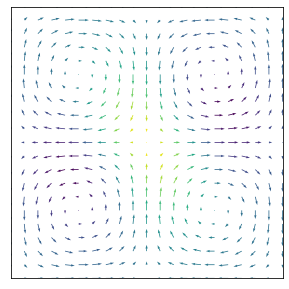

In [427]:
# copy from https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/ 
# Creating arrow
x = np.arange(0, 2 * np.pi + 2 * np.pi / 20,
              2 * np.pi / 20)
y = np.arange(0, 2 * np.pi + 2 * np.pi / 20,
              2 * np.pi / 20)
 
X, Y = np.meshgrid(x, y)
 
u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)
 
# Defining color
color = np.sqrt(((dx-n)/2)*2 + ((dy-n)/2)*2)
 
# Creating plot
fig, ax = plt.subplots(figsize =(5,5))
ax.quiver(X, Y, u, v, color, alpha = 1)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([0, 2 * np.pi, 0, 2 * np.pi])
ax.set_aspect('equal')
 
# show plot
plt.show()
plt.close()

#### 2-d plot

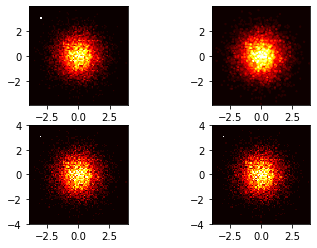

In [235]:
x = np.concatenate((np.random.randn(10000), -3*np.ones(10000)))
y = np.concatenate((np.random.randn(10000), 3*np.ones(10000)))

x_bins = np.linspace(-4,4,80)
y_bins = np.linspace(-4,4,80)

H, xedges, yedges = np.histogram2d(x, y, bins=(x_bins, y_bins))

xx = 1/2*(xedges[:-1] + xedges[1:])
yy = 1/2*(yedges[:-1] + yedges[1:])
plt.subplots(2,2)
plt.subplot(2,2,1)

# tranverse!
plt.imshow(H.T, origin='lower', cmap='hot',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), vmin=0, vmax=20)

plt.subplot(2,2,2)
plt.gca().set_aspect(1)
plt.contourf(xx, yy, H.T, cmap='hot', levels = np.linspace(0,20,100))

plt.subplot(2,2,3)
plt.gca().set_aspect(1)
plt.hist2d(x, y, bins=(x_bins, y_bins), cmap='hot', vmax=20)

plt.subplot(2,2,4)
plt.gca().set_aspect(1)
plt.pcolormesh(x_bins, y_bins, H.T, cmap='hot', vmax=20)
plt.show()
plt.close()

#### Histogram in polar axis

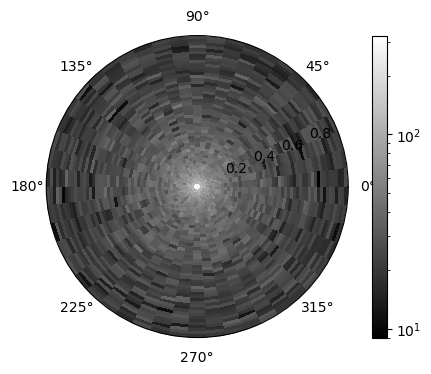

In [324]:
N = 100000
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection="polar"), dpi=100)
x = np.random.rand(N)**2 # r
y = 2*np.pi*np.random.rand(N)
h = np.histogram2d(x, y, bins=50)
im = ax.pcolormesh(h[2], h[1], h[0], norm=LogNorm(), cmap='gray')
fig.colorbar(im)
plt.show()
plt.close()

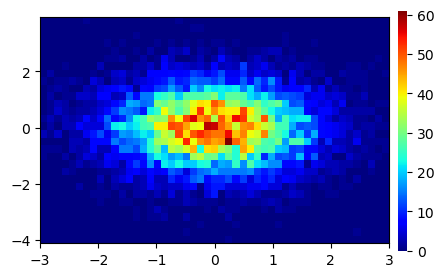

In [9]:
from matplotlib.colors import LogNorm
x = np.random.randn(10000)
y = np.random.randn(10000)
fig = plt.figure(figsize=(4.5,3), dpi=100)
ax = fig.add_subplot()
im = ax.hist2d(x, y, bins=(np.linspace(-3,3,50),30), cmap = 'jet')

fig.subplots_adjust(right=0.9, wspace=0.15)
cbar = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cb = fig.colorbar(im[3], cax=cbar, ticks=np.arange(0,100,10))

# other ways
# plt.colorbar(im,fraction=0.046, pad=0.04)

cb.outline.set_visible(False)
# better than cb.outline.set_edgecolor('#f9f2d7')

#### match automaticly

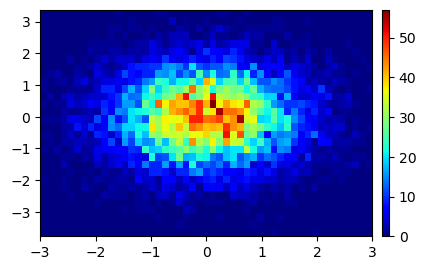

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
x = np.random.randn(10000)
y = np.random.randn(10000)
fig = plt.figure(figsize=(4.5,3), dpi=100)
ax = fig.add_subplot()
im = ax.hist2d(x, y, bins=(np.linspace(-3,3,50),30), cmap = 'jet')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
plt.colorbar(im[3], cax=cax)

#### custom colorbar

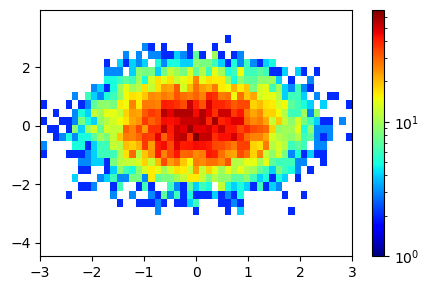

In [11]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('jet', 256)
newcolors = viridis(np.linspace(0, 1, 65536))
wt = np.array([1, 1, 1, 1])
newcolors[:25, :] = wt
newcmp = ListedColormap(newcolors)

from matplotlib.colors import LogNorm
x = np.random.randn(10000)
y = np.random.randn(10000)
fig = plt.figure(tight_layout=True, figsize=(4.5,3), dpi=100)
ax = fig.add_subplot(1,1,1)
im = ax.hist2d(x,y,bins=(np.linspace(-3,3,50),30), norm=LogNorm(), cmap = newcmp)
fig.colorbar(im[3])
plt.show()
plt.close()

#### log scale and double y

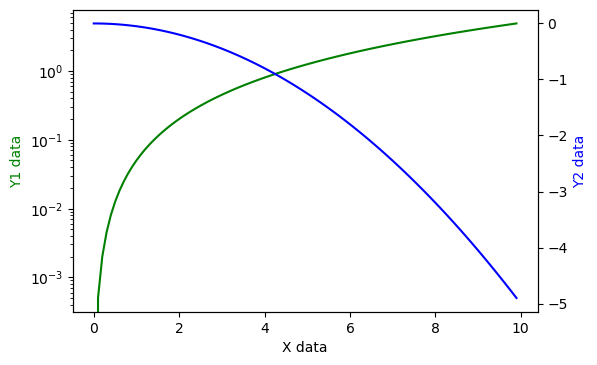

In [19]:
# copy from https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib#

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots(dpi=100)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

ax1.set_yscale('log')
plt.show()
plt.close()

#### subfigures

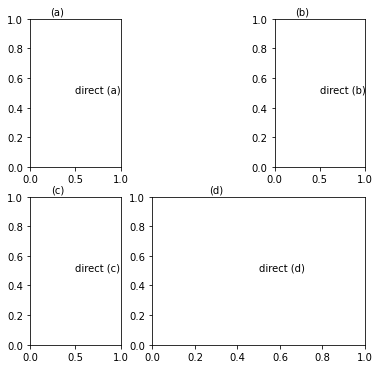

In [342]:
# define a grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(constrained_layout=False, figsize=(6,6))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig, hspace=0.2, wspace=0.35)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 2])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1:])

ax = [ax1, ax2, ax3, ax4]
strs = ['(a)','(b)','(c)', '(d)']
for i in range(4):
    ax[i].text(0.3, 1.05, # magic number
               '%s' % strs[i] , 
               horizontalalignment='center',
               verticalalignment='center', 
               transform=ax[i].transAxes, 
               fontsize=10)
    ax[i].text(0.5, 0.5, 'direct %s' % strs[i]) # direct
plt.show()
plt.close()

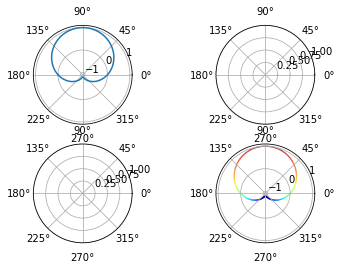

In [7]:
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
# notice axs is equal to shape in the subplots
x = np.linspace(-np.pi, np.pi, 300)
y = np.sin(x)
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y, s=0.1, c=y, cmap='jet')
plt.show()
plt.close()

#### share colorbar

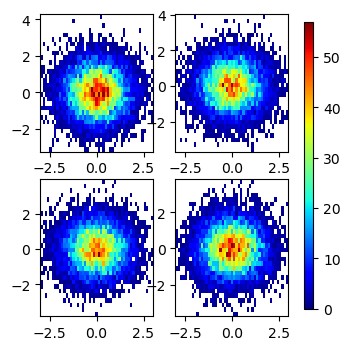

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(4,4), dpi=100)
N = 10000
for ax in axs.flatten():
    x = np.random.randn(10000)
    y = np.random.randn(10000)
    im = ax.hist2d(x,y,bins=(np.linspace(-3,3,50),30), cmap = newcmp)
fig.colorbar(im[3], ax=axs, aspect=30, shrink = 0.95)
plt.show()
plt.close()

#### fix axis height weight ratio

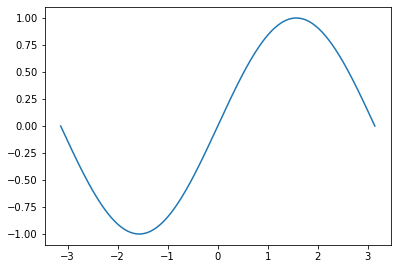

In [13]:
from mpl_toolkits.axes_grid1 import Divider, Size
fig = plt.figure(figsize=(6,4.5))
h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
v = [Size.Fixed(0.7), Size.Scaled(1.), Size.Fixed(.5)]
divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
ax = fig.add_axes(divider.get_position(),
                axes_locator=divider.new_locator(nx=1, ny=1))
x = np.linspace(-np.pi, np.pi, 300)
y = np.sin(x)
ax.plot(x,y)
plt.show()
plt.close()

#### aspect of x,y axis

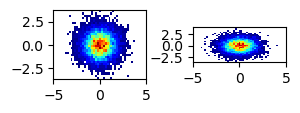

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(3,6), dpi=100)
plt.subplots_adjust(wspace=0.5)
N = 10000
for index, ax in enumerate(axs.flatten()):
    x = np.random.randn(10000)
    y = np.random.randn(10000)
    im = ax.hist2d(x,y,bins=(np.linspace(-5,5,50),30), cmap = newcmp)
    ax.set_aspect(1/(index+1))
plt.show()
plt.close()

#### 3d plot

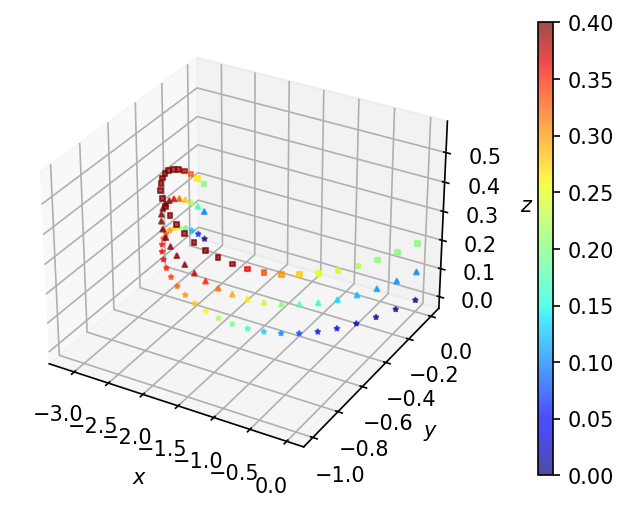

In [16]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')

# or
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

x = np.linspace(-np.pi, 0, 30)
y = np.sin(x)
z = 0.2*x*y
ml = ['*','^','s']
for i in range(3):
    im = ax.scatter(x, y, z+0.1*i, s = 5, c=z+0.1*i, marker=ml[i], 
               alpha=0.7, vmin=0, vmax=0.4, cmap='jet')
# here color is shared with height
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
fig.colorbar(im, ax=ax, pad=0.1, aspect=30)
plt.show()
plt.close()